In [ ]:
# Cat vs Dog prediction using Transfer Learning (Deep Learning)

# Here we are about 25,000 images of cat and dog and we will process them and when you give a new image it should tell you if that image is cat or dog. 
# Here we are using Transfer Learning and the pretrained model which we are using is called Mobile_net_v2. 

# The prediction we got for our model is 97% meaning for 100 images our model can predict correctly 97 images and tell us if that image is dog or cat. 
# For some reason if you can't see the file or it shows some error download the file. 

In [1]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# getting the dataset
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:10<00:00, 133MB/s]
100% 812M/812M [00:10<00:00, 82.4MB/s]


In [3]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [4]:
from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"

with ZipFile(dataset, "r") as zip:
  zip.extractall()
  print("The dataset has been extracted")

The dataset has been extracted


In [5]:
from zipfile import ZipFile

dataset2 = "/content/train.zip"

with ZipFile(dataset2, "r") as zip:
  zip.extractall()
  print("The training data has been extracted")

The training data has been extracted


In [6]:
# Counting the no of files in train data
import os

path, directory, files = next(os.walk("/content/train"))

file_count = len(files)

print("Total no of files in Train Data are :- ", file_count)

Total no of files in Train Data are :-  25000


In [7]:
file_name = os.listdir("/content/train")
print(file_name)

['cat.8324.jpg', 'cat.11730.jpg', 'dog.10296.jpg', 'cat.4024.jpg', 'dog.138.jpg', 'dog.9114.jpg', 'cat.9052.jpg', 'cat.11987.jpg', 'dog.10130.jpg', 'cat.4165.jpg', 'cat.3562.jpg', 'dog.5038.jpg', 'dog.10633.jpg', 'cat.3398.jpg', 'cat.7371.jpg', 'cat.11991.jpg', 'cat.1638.jpg', 'cat.4416.jpg', 'cat.5712.jpg', 'cat.10262.jpg', 'cat.1433.jpg', 'cat.8496.jpg', 'cat.10982.jpg', 'cat.9263.jpg', 'dog.6443.jpg', 'dog.8768.jpg', 'dog.640.jpg', 'dog.12309.jpg', 'cat.3085.jpg', 'dog.8557.jpg', 'dog.5144.jpg', 'cat.9861.jpg', 'cat.8236.jpg', 'dog.240.jpg', 'dog.6998.jpg', 'dog.4677.jpg', 'cat.8844.jpg', 'dog.10241.jpg', 'dog.8143.jpg', 'dog.11828.jpg', 'dog.8551.jpg', 'cat.4571.jpg', 'cat.10242.jpg', 'cat.286.jpg', 'cat.5945.jpg', 'cat.3499.jpg', 'cat.7120.jpg', 'dog.10433.jpg', 'dog.5694.jpg', 'cat.5777.jpg', 'cat.9813.jpg', 'cat.1211.jpg', 'cat.9834.jpg', 'dog.6836.jpg', 'cat.10901.jpg', 'dog.6620.jpg', 'cat.2079.jpg', 'cat.5827.jpg', 'cat.8644.jpg', 'cat.8961.jpg', 'cat.8704.jpg', 'cat.12258.jp

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab.patches import cv2_imshow

import cv2

In [9]:
img = mpimg.imread("/content/train/cat.8215.jpg")

array([[[ 45,  72,  37],
        [ 50,  77,  42],
        [ 51,  78,  43],
        ...,
        [143, 107,  91],
        [144, 108,  92],
        [145, 109,  93]],

       [[ 42,  69,  34],
        [ 47,  74,  39],
        [ 48,  75,  40],
        ...,
        [142, 106,  90],
        [142, 106,  90],
        [141, 105,  89]],

       [[ 44,  70,  35],
        [ 48,  74,  39],
        [ 49,  75,  40],
        ...,
        [140, 104,  88],
        [138, 102,  86],
        [136, 100,  84]],

       ...,

       [[ 30,  16,  13],
        [ 30,  16,  13],
        [ 29,  18,  12],
        ...,
        [ 69,  41,  29],
        [ 71,  43,  31],
        [ 74,  46,  34]],

       [[ 28,  14,  11],
        [ 29,  15,  12],
        [ 28,  17,  11],
        ...,
        [ 68,  40,  28],
        [ 71,  43,  31],
        [ 74,  46,  34]],

       [[ 27,  13,  10],
        [ 28,  14,  11],
        [ 27,  16,  10],
        ...,
        [ 68,  40,  28],
        [ 71,  43,  31],
        [ 73,  45,  33]]], dtype=uint8)
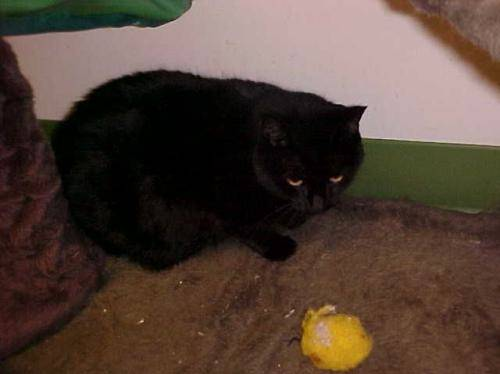

In [10]:
img

In [11]:
file_name = os.listdir("/content/train")

for i in range(5):
  name = file_name[i]
  print(name[0:3])

cat
cat
dog
cat
dog


In [12]:
dog_count = 0
cat_count = 0

for i in file_name:
  name = i[0:3]

  if name=="dog":
    dog_count +=1
  elif name=="cat":
    cat_count +=1

print("No of dogs are :- ", dog_count)
print("No of cats are :- ", cat_count)

No of dogs are :-  12500
No of cats are :-  12500


In [13]:
# Making directory

os.mkdir("/content/image_resized")

In [14]:
original_folder = "/content/train/"
image_resized = "/content/image_resized/"

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  # Now you can resize the image :-
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert("RGB")

  newimagepath = image_resized + filename
  img.save(newimagepath)

In [15]:
# checking the resized image
img = mpimg.imread("/content/image_resized/cat.1001.jpg")

array([[[ 57,  54,  21],
        [ 55,  52,  19],
        [ 56,  50,  18],
        ...,
        [ 37,  29,  16],
        [ 31,  19,   7],
        [ 38,  26,  14]],

       [[ 54,  51,  18],
        [ 54,  49,  17],
        [ 53,  47,  15],
        ...,
        [ 37,  29,  16],
        [ 34,  24,  12],
        [ 39,  29,  17]],

       [[ 52,  47,  15],
        [ 50,  45,  13],
        [ 50,  44,  12],
        ...,
        [ 64,  58,  46],
        [ 61,  55,  43],
        [ 66,  58,  47]],

       ...,

       [[ 46, 169, 106],
        [ 49, 169, 107],
        [ 50, 168, 107],
        ...,
        [ 27, 154, 101],
        [ 23, 154, 100],
        [ 19, 154,  98]],

       [[ 46, 166, 104],
        [ 46, 166, 104],
        [ 48, 166, 105],
        ...,
        [ 32, 156, 106],
        [ 26, 153, 102],
        [ 23, 151, 100]],

       [[ 43, 163, 101],
        [ 44, 164, 102],
        [ 48, 164, 103],
        ...,
        [ 37, 161, 111],
        [ 34, 158, 108],
        [ 31, 158, 107]]], dtype=uint8)
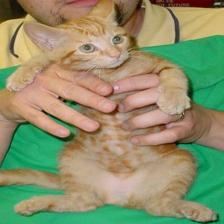

In [16]:
img

In [17]:
# Now let's create labels for dog and cat

# cat 0
# dog 1

filename = os.listdir("/content/image_resized")

labels = []

for i in filename:
  name = i[0:3]

  if name=="dog":
    labels.append(1)
  elif name=="cat":
    labels.append(0)

In [18]:
print(filename[0:5])
print(len(filename))

['cat.8324.jpg', 'cat.11730.jpg', 'dog.10296.jpg', 'cat.4024.jpg', 'dog.138.jpg']
2000


In [19]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 1]
2000


In [20]:
# Counting no of dog images and cat images.

filename = os.listdir("/content/image_resized")

dog_count = 0
cat_count = 0

for i in filename:
  name = i[0:3]

  if name=="dog":
    dog_count +=1
  elif name=="cat":
    cat_count +=1

print("The no of dog images in resized folder is :- ", dog_count)
print("The no of cat images in resized folder is :- ", cat_count)

The no of dog images in resized folder is :-  1009
The no of cat images in resized folder is :-  991


In [21]:
# Converting the images to numpy array before feeding them to our DL

resized_folder = os.listdir("/content/image_resized")
print(resized_folder)

['cat.8324.jpg', 'cat.11730.jpg', 'dog.10296.jpg', 'cat.4024.jpg', 'dog.138.jpg', 'dog.9114.jpg', 'cat.9052.jpg', 'cat.11987.jpg', 'dog.10130.jpg', 'cat.4165.jpg', 'cat.3562.jpg', 'dog.5038.jpg', 'dog.10633.jpg', 'cat.3398.jpg', 'cat.7371.jpg', 'cat.11991.jpg', 'cat.1638.jpg', 'cat.4416.jpg', 'cat.5712.jpg', 'cat.10262.jpg', 'cat.1433.jpg', 'cat.8496.jpg', 'cat.10982.jpg', 'cat.9263.jpg', 'dog.6443.jpg', 'dog.8768.jpg', 'dog.640.jpg', 'dog.12309.jpg', 'cat.3085.jpg', 'dog.8557.jpg', 'dog.5144.jpg', 'cat.9861.jpg', 'cat.8236.jpg', 'dog.240.jpg', 'dog.6998.jpg', 'dog.4677.jpg', 'cat.8844.jpg', 'dog.10241.jpg', 'dog.8143.jpg', 'dog.11828.jpg', 'dog.8551.jpg', 'cat.4571.jpg', 'cat.10242.jpg', 'cat.286.jpg', 'cat.5945.jpg', 'cat.3499.jpg', 'cat.7120.jpg', 'dog.10433.jpg', 'dog.5694.jpg', 'cat.5777.jpg', 'cat.9813.jpg', 'cat.1211.jpg', 'cat.9834.jpg', 'dog.6836.jpg', 'cat.10901.jpg', 'dog.6620.jpg', 'cat.2079.jpg', 'cat.5827.jpg', 'cat.8644.jpg', 'cat.8961.jpg', 'cat.8704.jpg', 'cat.12258.jp

In [22]:
img_array = []

for i in resized_folder:
  img_path = "/content/image_resized/"+i
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img_array.append(img)

img_array = np.array(img_array)

In [23]:
img_array

array([[[[ 61,  51,  50],
         [ 59,  49,  48],
         [ 57,  47,  46],
         ...,
         [109,  88,  83],
         [109,  88,  83],
         [109,  88,  83]],

        [[ 60,  50,  49],
         [ 60,  50,  49],
         [ 60,  50,  49],
         ...,
         [109,  88,  83],
         [109,  88,  83],
         [109,  88,  83]],

        [[ 56,  46,  45],
         [ 58,  48,  47],
         [ 61,  51,  50],
         ...,
         [110,  89,  84],
         [110,  89,  86],
         [110,  89,  86]],

        ...,

        [[152, 151, 149],
         [156, 155, 153],
         [155, 154, 152],
         ...,
         [ 81,  62,  48],
         [ 81,  59,  46],
         [ 80,  58,  45]],

        [[141, 140, 138],
         [146, 145, 143],
         [147, 146, 144],
         ...,
         [ 81,  62,  48],
         [ 81,  59,  46],
         [ 80,  58,  45]],

        [[136, 135, 133],
         [141, 140, 138],
         [144, 143, 141],
         ...,
         [ 80,  61,  47],
        

In [24]:
img_array.shape

(2000, 224, 224, 3)

In [25]:
# splitting into labes (X&Y)

X = img_array
Y = np.asarray(labels)

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, stratify=Y)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [28]:
# Scaling the data
X_train = X_train/255
X_test = X_test/255

In [29]:
X_train

array([[[[0.65098039, 0.67843137, 0.74901961],
         [0.69411765, 0.72156863, 0.79215686],
         [0.72941176, 0.75686275, 0.82745098],
         ...,
         [0.59607843, 0.60784314, 0.62745098],
         [0.58823529, 0.60392157, 0.61568627],
         [0.58039216, 0.59607843, 0.60784314]],

        [[0.65882353, 0.68627451, 0.75686275],
         [0.70196078, 0.72941176, 0.8       ],
         [0.7372549 , 0.76470588, 0.83529412],
         ...,
         [0.90980392, 0.92156863, 0.94117647],
         [0.90196078, 0.91764706, 0.92941176],
         [0.89411765, 0.90980392, 0.92156863]],

        [[0.67058824, 0.69803922, 0.76078431],
         [0.70980392, 0.7372549 , 0.8       ],
         [0.74117647, 0.76862745, 0.83137255],
         ...,
         [0.98823529, 1.        , 1.        ],
         [0.97647059, 0.99215686, 1.        ],
         [0.96470588, 0.98039216, 0.99215686]],

        ...,

        [[0.38823529, 0.41176471, 0.41176471],
         [0.37254902, 0.39607843, 0.39607843]

## **Building the Neural Network**

In [34]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
import tensorflow_hub as hub

In [32]:
mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(model, input_shape=(224,224,3), trainable=False)

In [35]:
num_of_classes = 2

model = keras.Sequential([pretrained_model,
                          keras.layers.Dense(num_of_classes),
                          ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [36]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])

In [37]:
model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
45/45 [==============================] - 71s 1s/step - loss: 0.2034 - accuracy: 0.9215 - val_loss: 0.1070 - val_accuracy: 0.9688
Epoch 2/5
45/45 [==============================] - 61s 1s/step - loss: 0.0585 - accuracy: 0.9833 - val_loss: 0.0761 - val_accuracy: 0.9688
Epoch 3/5
45/45 [==============================] - 60s 1s/step - loss: 0.0416 - accuracy: 0.9896 - val_loss: 0.0630 - val_accuracy: 0.9750
Epoch 4/5
45/45 [==============================] - 61s 1s/step - loss: 0.0326 - accuracy: 0.9910 - val_loss: 0.0572 - val_accuracy: 0.9750
Epoch 5/5
45/45 [==============================] - 64s 1s/step - loss: 0.0254 - accuracy: 0.9931 - val_loss: 0.0552 - val_accuracy: 0.9812


In [39]:
loss, accuracy = model.evaluate(X_test,Y_test)

13/13 [==============================] - 13s 977ms/step - loss: 0.0501 - accuracy: 0.9750


## **Building Predictive System**

In [43]:
input_image_path = input("Path of the image")
img = cv2.imread(input_image_path)

img # see the image

resize_img = cv2.resize(img, (224,224))
resize_img # see the image if it has been resized

resize_img = resize_img/255 # scaled

resize_img = np.reshape(resize_img, [1,224,224,3])

prediction = model.predict(resize_img)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if prediction_label[0]==0:
  print("The image represents Cat")
else:
  print("The image represents dog")

Path of the image/content/dog.jpg
1/1 [==============================] - 0s 52ms/step
[[-0.47798547  0.9785756 ]]
[1]
The image represents dog
